In [8]:
import requests, zipfile, io, os, time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pairs = ['AUDJPY', 'AUDNZD', 'AUDUSD', 'CADJPY', 'CHFJPY', 'EURGBP', 'EURJPY', 'EURUSD', 'GBPJPY', 'GBPUSD', 'NZDUSD', 'USDCAD']
years = ['2012', '2013', '2014', '2015', '2016', '2017']
months = ['JANUARY', 'FEBRUARY', 'MARCH', 'APRIL', 'MAY', 'JUNE', 'JULY', 'AUGUST', 'SEPTEMBER', 'OCTOBER', 'NOVEMBER', 'DECEMBER']

def get_pickle(pairs=None, years=None, months=None, directory='data'):
    def cast_to_array(param):
        if type(param) in [str, type(None)]: 
            param = [param]
        return param
    
    def filter_files(params, files = []):
        _files = []
        data_files = [f for f in os.listdir('data') if '.pickle' in f]
        for param in cast_to_array(params):
            if not param:
                break
            if len(param) == 2:
                sym = '.'
            else:
                sym = '-'
            _files = [f for f in data_files if param + sym in f]
            files += _files
        return files
    
    files = []
    files = filter_files(pairs, files)
    files = filter_files(years, files)
    files = filter_files(months, files)

    if directory[-1] != '/':
        directory += '/'
        
    df = None
    for f in files:
        _df = pd.read_pickle(directory + f)
        if type(df) != pd.DataFrame:
            df = _df
        else:
            df = pd.concat([df, _df])
            
    return df.sort_index()

def quick_plot(df):
    num_of_pairs = len(df.pair.unique())
    
    cols = int(num_of_pairs/(3-1))
    if num_of_pairs == 1:
        rows = cols = 1
    elif num_of_pairs < 3:
        rows = num_of_pairs
    else:
        rows = 3
    
    fig=plt.figure(figsize=(9*rows, 6*cols), dpi= 80, facecolor='w', edgecolor='k')
    
    for v, pair in enumerate(df.pair.unique()):
        df_pair = df[df.pair == pair]
        ax = plt.subplot(cols, rows, v + 1)
        ax.text(0.5, 0.9, pair, horizontalalignment='center',
                verticalalignment='center', transform=ax.transAxes)
        ax.plot(df_pair.index, df_pair.close)

    plt.show()

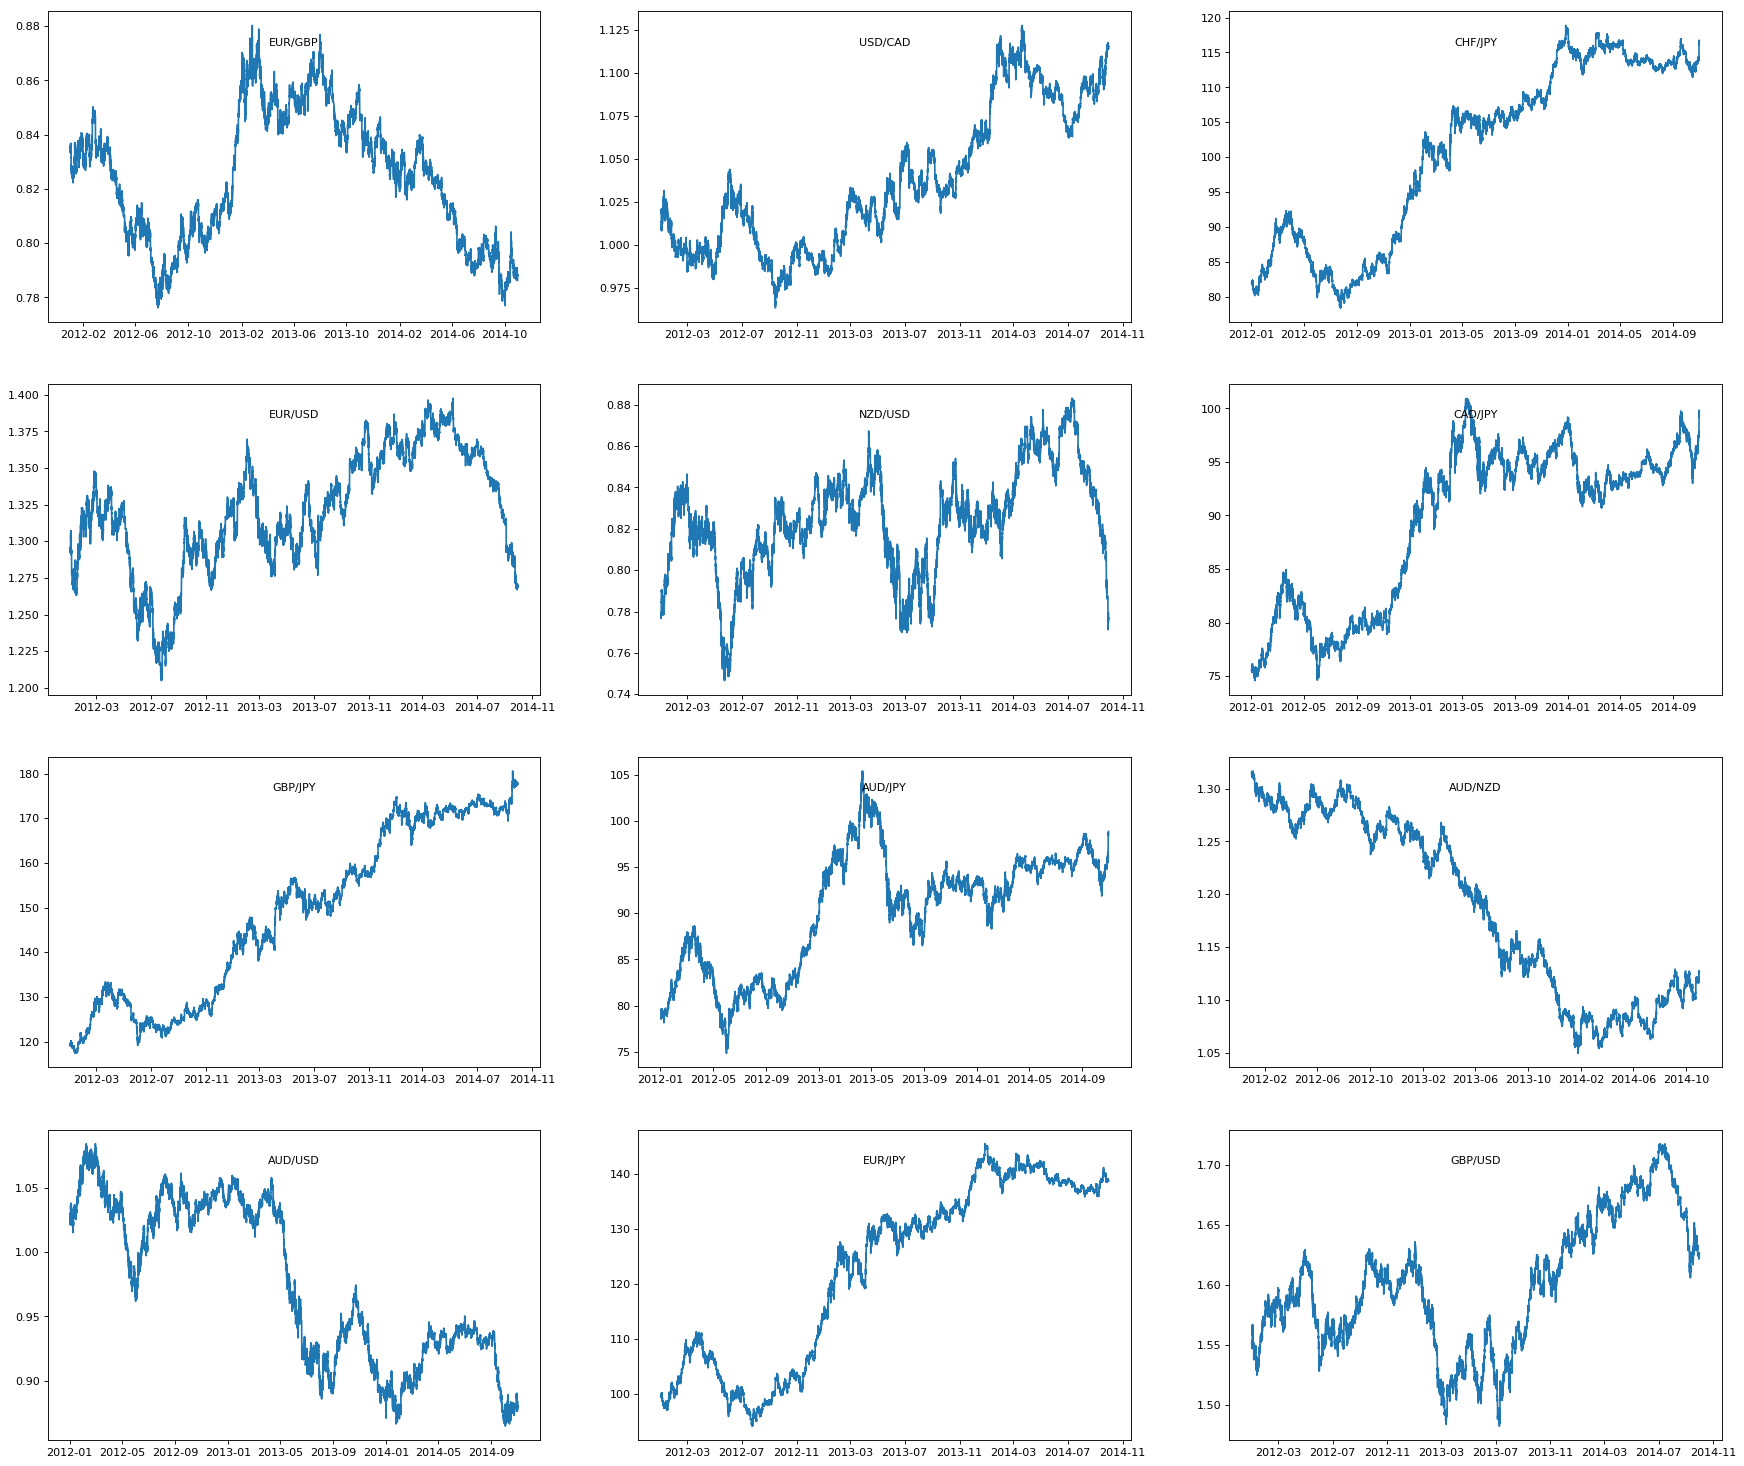

In [3]:
df = get_pickle(pairs)
quick_plot(df)

In [69]:
dff = df[df.pair == 'EUR/USD']

# Time Feature

In [72]:
def sin_encode(t, T):
    return np.sin(2*np.pi*(t/T))

def encode_temporal(index):
    T = len(index.unique())
    return sin_encode(index, T)

def quick_plot_encoding(encoding, xlim=1000):
    plt.plot(encoding)
    plt.xlim(0,xlim)
    plt.show()

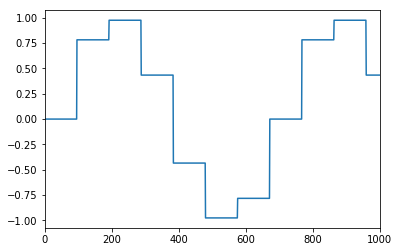

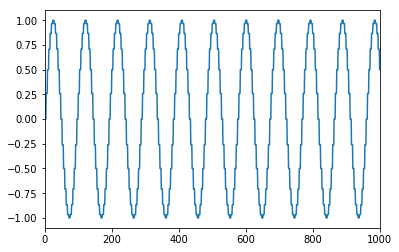

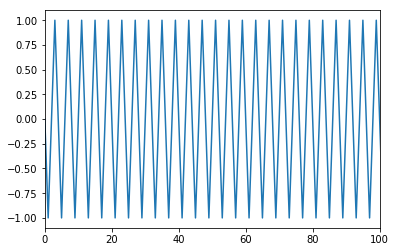

In [73]:
dayofweek_encode = encode_temporal(dff.index.dayofweek)
hour_encode = encode_temporal(dff.index.hour)
minute_encode = encode_temporal(dff.index.minute)

quick_plot_encoding(dayofweek_encode)
quick_plot_encoding(hour_encode)
quick_plot_encoding(minute_encode, 100)

# Market Feature

In [48]:
from scipy.stats import zscore

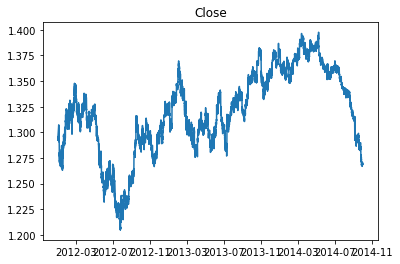

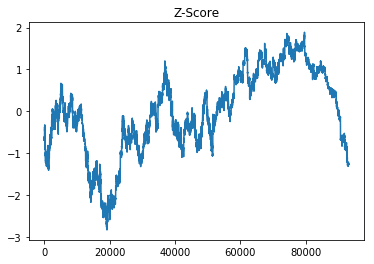

In [81]:
plt.plot(dff.close)
plt.title('Close')
plt.show()

zs = zscore(dff.close)
plt.plot(zs)
plt.title('Z-Score')
plt.show()

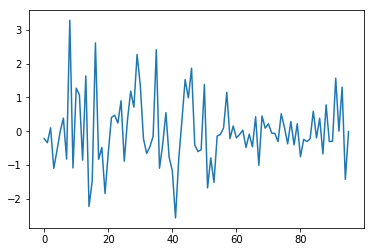

In [96]:
log_ret = np.log(dff.close) - np.log(dff.close.shift(1))
plt.plot(zscore(log_ret[-96:]))
plt.show()

In [102]:
def rolling_zscore(ar):
    return zscore(ar)[-1]
norms = log_ret.rolling(96).apply(_zscore)

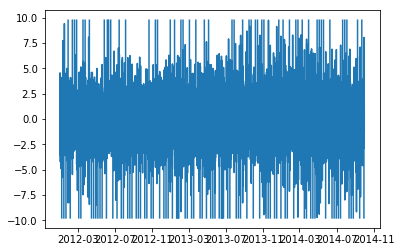

In [103]:
plt.plot(norms)
plt.show()

In [114]:
(log_ret - log_ret.rolling(96).mean()) / log_ret.rolling(96).std()

datetime
2012-01-02 00:00:00         NaN
2012-01-02 00:15:00         NaN
2012-01-02 00:30:00         NaN
2012-01-02 00:45:00         NaN
2012-01-02 01:00:00         NaN
2012-01-02 01:15:00         NaN
2012-01-02 01:30:00         NaN
2012-01-02 01:45:00         NaN
2012-01-02 02:00:00         NaN
2012-01-02 02:15:00         NaN
2012-01-02 02:30:00         NaN
2012-01-02 02:45:00         NaN
2012-01-02 03:00:00         NaN
2012-01-02 03:15:00         NaN
2012-01-02 03:30:00         NaN
2012-01-02 03:45:00         NaN
2012-01-02 04:00:00         NaN
2012-01-02 04:15:00         NaN
2012-01-02 04:30:00         NaN
2012-01-02 04:45:00         NaN
2012-01-02 05:00:00         NaN
2012-01-02 05:15:00         NaN
2012-01-02 05:30:00         NaN
2012-01-02 05:45:00         NaN
2012-01-02 06:00:00         NaN
2012-01-02 06:15:00         NaN
2012-01-02 06:30:00         NaN
2012-01-02 06:45:00         NaN
2012-01-02 07:00:00         NaN
2012-01-02 07:15:00         NaN
                         ...   

In [111]:
norms

datetime
2012-01-02 00:00:00         NaN
2012-01-02 00:15:00         NaN
2012-01-02 00:30:00         NaN
2012-01-02 00:45:00         NaN
2012-01-02 01:00:00         NaN
2012-01-02 01:15:00         NaN
2012-01-02 01:30:00         NaN
2012-01-02 01:45:00         NaN
2012-01-02 02:00:00         NaN
2012-01-02 02:15:00         NaN
2012-01-02 02:30:00         NaN
2012-01-02 02:45:00         NaN
2012-01-02 03:00:00         NaN
2012-01-02 03:15:00         NaN
2012-01-02 03:30:00         NaN
2012-01-02 03:45:00         NaN
2012-01-02 04:00:00         NaN
2012-01-02 04:15:00         NaN
2012-01-02 04:30:00         NaN
2012-01-02 04:45:00         NaN
2012-01-02 05:00:00         NaN
2012-01-02 05:15:00         NaN
2012-01-02 05:30:00         NaN
2012-01-02 05:45:00         NaN
2012-01-02 06:00:00         NaN
2012-01-02 06:15:00         NaN
2012-01-02 06:30:00         NaN
2012-01-02 06:45:00         NaN
2012-01-02 07:00:00         NaN
2012-01-02 07:15:00         NaN
                         ...   

In [118]:
zscore(log_ret[-96:])

array([ -2.18945758e-01,  -3.39655193e-01,   9.92321762e-02,
        -1.09694077e+00,  -5.70330879e-01,  -1.04800520e-02,
         3.84711054e-01,  -8.22875648e-01,   3.28151075e+00,
        -1.08544934e+00,   1.27280051e+00,   1.07488939e+00,
        -8.54666842e-01,   1.63369624e+00,  -2.22492483e+00,
        -1.46945362e+00,   2.61066189e+00,  -8.32778558e-01,
        -4.82044872e-01,  -1.84256969e+00,  -6.47052823e-01,
         4.06588256e-01,   4.72356400e-01,   2.41868853e-01,
         9.00000505e-01,  -8.88073614e-01,   3.29595305e-01,
         1.18496225e+00,   7.13094099e-01,   2.26867792e+00,
         1.35826662e+00,  -2.29502256e-01,  -6.56569209e-01,
        -4.59555501e-01,  -1.52918137e-01,   2.40902672e+00,
        -1.09415560e+00,  -3.82783549e-01,   5.47800650e-01,
        -7.65965050e-01,  -1.17143099e+00,  -2.56398738e+00,
        -8.21962768e-01,   3.18491087e-01,   1.52427235e+00,
         9.86626156e-01,   1.86224708e+00,  -4.04700723e-01,
        -6.01877917e-01,

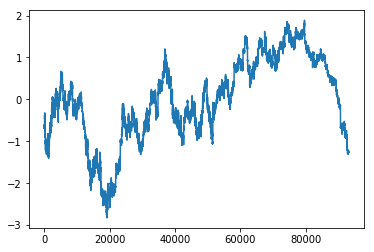

In [121]:
plt.plot(zscore(dff.close))
plt.show()